### Placement Data Analysis 

Exploratory Data Analysis - Placement Data - 
=> Analysing which factors do matter in getting placements!

**Background :-

There are many factors which affect the Placements in various companies. 
Each company's criteria is different. Some companies give importance to MBA and Graduate percentage.
Some consider percentage of all i.e. SSC, HSC, Graduation & Post-graduation for placements.
Some give importance to student's specialization field etc.
Some companies want such employees who are from famous institutions in the sense they consider students from specific boards.
So let's start to analyze this Placement dataset

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Loading Dataset
campus_data = pd.read_csv("E:\STUDY MATERIAL - IMP\Placement_Data_Full_Class.csv")
campus_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
sl_no,1,2,3,4,5,6,7,8,9,10
gender,M,M,M,M,M,M,F,M,M,M
ssc_p,67,79.33,65,56,85.8,55,46,82,73,58
ssc_b,Others,Central,Central,Central,Central,Others,Others,Central,Central,Central
hsc_p,91,78.33,68,52,73.6,49.8,49.2,64,79,70
hsc_b,Others,Others,Central,Central,Central,Others,Others,Central,Central,Central
hsc_s,Commerce,Science,Arts,Science,Commerce,Science,Commerce,Science,Commerce,Commerce
degree_p,58,77.48,64,52,73.3,67.25,79,66,72,61
degree_t,Sci&Tech,Sci&Tech,Comm&Mgmt,Sci&Tech,Comm&Mgmt,Sci&Tech,Comm&Mgmt,Sci&Tech,Comm&Mgmt,Comm&Mgmt
workex,No,Yes,No,No,No,Yes,No,Yes,No,No


**Looking at this Dataset, we come across the Questionnaire below :-
A) Primary questions :

1. How many male & female students got placed ?
2. Are SSC & HSC Boards affecting the placements ? in how many extent ?
3. Students from which stream (of HSC) as well as faculty of graduation are more likely to get placement ? 
4. Let's check the count for how many students have work experience (gender wise)
   (Does work experience matter in getting placements ?)
5. How many female & male students having which specialisation in MBA ? 
6. How do specialization and work experience fields affect the placement ? Taking their count
**Data visualisation for above results

**B) Secondary questions : 

a) Let's have status count considering 2 categorical features together at a time to check how they do affect in placements...those combinations are given below-
1) Gender & Specialisation
2) Gender & Stream of degree
3) HSC board & Stream of degree
4) Stream of degree & Specialisation
5) HSC board & Specialisation
6) Specialisation & Work experience 

b) Analysis of continuous features
1) How does percentage of SSC & HSC affect the placement ?
2) How does percentage of degree & HSC affect the placement ?
3) How does percentage of MBA & e-test affect the placement ?
**In Data Visualization using pairplot we are able to see all continuous features at a glance 

Very first let's find out shape & basic info of the dataset 
shape attribute gives us number of rows & columns in the dataset and info gives data type of each column 

In [3]:
# Printing basic info about dataset
print(campus_data.shape) 
print(campus_data.info()) 

(215, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
 15  Unnamed: 15     0 non-null      float64
 16  Unnamed: 16     0 non-null      float64
 17  Unnamed: 17     1 non-nul

From above - we have come up with following observations 
1. There are total 14 features - (Nothing to do with the last 3 columns please ignore it)
2. Status is the target variable which indicates whether the student is placed or not 
3. Out of 14 features 7 are catogorical features and rest 6 (including serial No. that is sl_no) are continuous features.  


In [4]:
# Nothing to do with the last 3 columns so deleting those columns
delete_cols = ['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'] 
campus_data.drop(delete_cols, axis=1, inplace=True) 

In [5]:
# Describing Data
campus_data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


1. Average 10th grade percentage is 67% and the highest is 89.4%.
2. Average 12th grade percentage is 66% and the highest is 91%.
3. Aggregate degree percentage is 65% and the highest is 89.4%
4. Aggregate MBA percentage is 62% and the highest is 77.89%
5. Average salary a MBA student gets is 2.65 LPA
6. Highest salary for a MBA student is 9.4 LPA
7. Lowest is 2 LPA

**Data wrangling :

In [5]:
# Checking for the null values 
campus_data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

*No Null values except the Salary column. Salary has 67 missing values. We'll check it out later on.

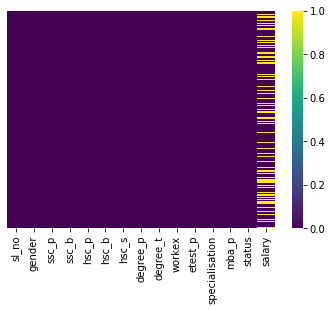

In [6]:
# We can visualize this using Heatmap 
sns.heatmap(campus_data.isnull(), yticklabels=False, cmap="viridis") 

In [13]:
# Let's see if there is any reason for these missing values in Salary
campus_data.groupby('status').salary.count() 

status
Not Placed      0
Placed        148
Name: salary, dtype: int64

As we can see here; there's a reason for missing values. These are only for observations where the Status is "Not Placed".

In [7]:
# Filling NaN values with 0s(Zeros) 
campus=campus_data.copy()
campus['salary'].loc[campus['salary'].isnull()]=0 
print(campus['salary'].isnull().sum()) 

0


C:\Users\Kalyani\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


We'll impute null values in salary feature with 0 because these students are not placed. We cannot remove these observations because there are 148 null values and if we remove it'll affect the data during modelling. 

**Now we are taking categorical features one by one to take value counts of our dependent variable i.e. status which has 2 values Placed & Not Placed. 

In [8]:
# Let's find out status count... grouping is done based on gender 
campus_data.groupby('gender').status.value_counts() 

gender  status    
F       Placed         48
        Not Placed     28
M       Placed        100
        Not Placed     39
Name: status, dtype: int64

1. As we can see, there are total 76 female students and 139 male students
2. 48 out of 76 female students are placed, so Placed ratio for women is 63%
3. 100 out of 139 male students are placed, so Placed ratio for men is 71%


In [9]:
# Let's find out status count... grouping is done based on Secondary education boards 
campus_data.groupby('ssc_b').status.value_counts() 

ssc_b    status    
Central  Placed        78
         Not Placed    38
Others   Placed        70
         Not Placed    29
Name: status, dtype: int64

Here, we can see 
1. 78 out of 116 students from Central Secondary Boards are placed
2. 70 out of 99 students from Other Secondary Boards(State,ICSE) are placed


In [10]:
# Let's find out status count... grouping is done based on Higher Secondary education boards
campus_data.groupby('hsc_b').status.value_counts() 

hsc_b    status    
Central  Placed        57
         Not Placed    27
Others   Placed        91
         Not Placed    40
Name: status, dtype: int64

1. 57 out of 84 12th grade Central board students are placed
2. 91 out of 131 12th grade Other board students are placed


In [11]:
# Let's find out status count... grouping is done based on stream of Higher Secondary education
campus_data.groupby('hsc_s').status.value_counts() 

hsc_s     status    
Arts      Placed         6
          Not Placed     5
Commerce  Placed        79
          Not Placed    34
Science   Placed        63
          Not Placed    28
Name: status, dtype: int64

1. 79 out of 113 students who took commerce in their 12th grade are placed (69.91%)
2. 63 out of 91 students who took science in their 12th grade are placed (69%)
3. 6 out of 11 students who took Arts in their 12th grade are placed (54%)  

In [12]:
# Let's find out status count... grouping is done based on stream of Graduation degree
campus_data.groupby('degree_t').status.value_counts()

degree_t   status    
Comm&Mgmt  Placed        102
           Not Placed     43
Others     Not Placed      6
           Placed          5
Sci&Tech   Placed         41
           Not Placed     18
Name: status, dtype: int64

1. Commerce & management graduate students have 70% placements
2. Science & Technology graduate students have 69% placements
3. other students have 45% placements 

In [9]:
# Let's find out how many female and male students having work experience or not
campus_data.groupby('gender').workex.value_counts() 

gender  workex
F       No        54
        Yes       22
M       No        87
        Yes       52
Name: workex, dtype: int64

from above result it's clear that
1. Most of the students don't have work experience regardless of males or females
2. Percentage of Female having no work experience is 71% and Percentage of Male having no work experience is  62%

In [11]:
# Let's find out how many female and male students are from which specialization field
campus_data.groupby('specialisation').gender.value_counts() 

specialisation  gender
Mkt&Fin         M         83
                F         37
Mkt&HR          M         56
                F         39
Name: gender, dtype: int64

Having a look on above result we can say that
1. Number of male students in marketing and Finance field is more than those in Marketing and HR field. 
2. Ratio of Female to male in marketing and HR is better than that of in marketing and finance 

### **Data Visualization 

Here we are going to start Data Visualization means graphical representation of Data which will make our analysis more clear and understandable  

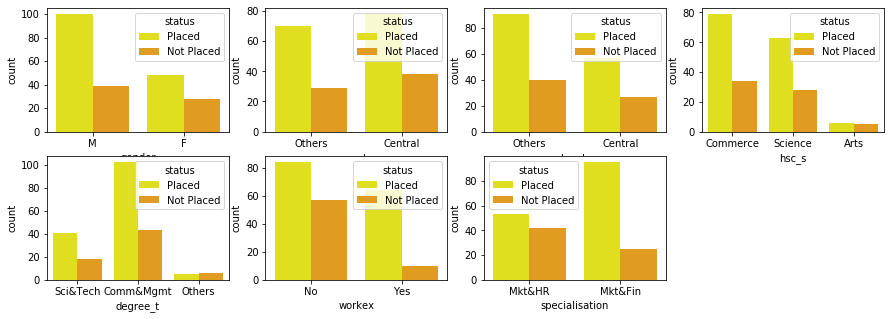

In [3]:
fig,axes=plt.subplots(2,4,figsize=(15,5)) 
sns.countplot('gender',hue='status',data=campus_data,ax=axes[0,0], palette=['yellow','orange']) 
sns.countplot('ssc_b',hue='status',data=campus_data,ax=axes[0,1], palette=['yellow','orange'])
sns.countplot('hsc_b',hue='status',data=campus_data,ax=axes[0,2], palette=['yellow','orange'])
sns.countplot('hsc_s',hue='status',data=campus_data,ax=axes[0,3], palette=['yellow','orange'])
sns.countplot('degree_t',hue='status',data=campus_data,ax=axes[1,0], palette=['yellow','orange'])
sns.countplot('workex',hue='status',data=campus_data,ax=axes[1,1], palette=['yellow','orange'])
sns.countplot('specialisation',hue='status',data=campus_data,ax=axes[1,2], palette=['yellow','orange'])
fig.delaxes(axes[1,3]) 
plt.show() 


**Insights :-
As we can see in these subplots, the common thread or thing is a status. Here we tried to find out count of students who are placed & who are not placed with the grouping done based on each categorical feature which are given below : 

a) 1st subplot - count of the students gender wise 
b) 2nd subplot - count of the students belonging various secondary school boards 
c) 3rd subplot - count of the students belonging various higher secondary school boards 
d) 4th subplot - count of the students from various streams of higher secondary school  
e) 5th subplot - count of the students belonging various streams of graduation
f) 6th subplot - count of the students based on whether they having work experience or not
g) 7th subplot - count of the students based on their specialization in MBA 

Now, We are going to perform Data visualization based on each feature

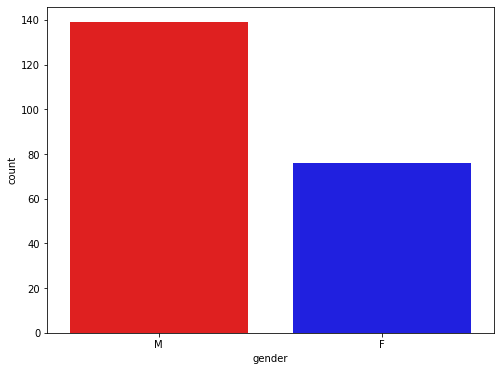

In [5]:
# Now we are checking for total no. of male and female students
plt.figure(figsize=(8,6))
sns.countplot(x='gender', data=campus_data, palette=['red','blue']) 

As we can see here male students' count is more than female students i.e. males are 139 and females are 76 

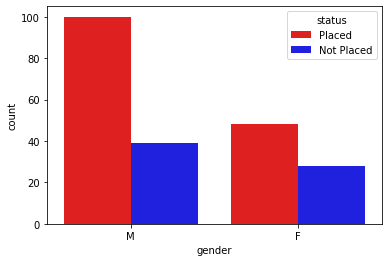

In [6]:
# Let's check how many men and women are placed?
sns.countplot('gender', hue='status', data=campus_data, palette=['red','blue'])  

By looking at this graph we get to know that count of the male student placed is more than that of the female student. 

In [5]:
# Now Let's check how many students are placed based on whether they have work experience 
campus_data.groupby('workex').status.value_counts() 

workex  status    
No      Placed        84
        Not Placed    57
Yes     Placed        64
        Not Placed    10
Name: status, dtype: int64

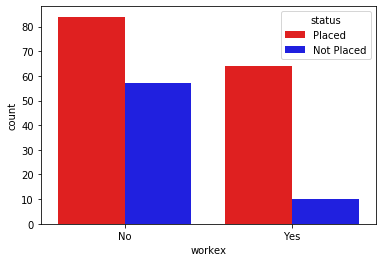

In [7]:
# Let's visualize above result 
sns.countplot('workex', hue='status', data=campus_data, palette=['red','blue']) 

Here we get to know about the count of students who are placed or not based on whether they have work experience. By looking at this mostly the students having no work experience are placed   

In [7]:
# Let's check how many students do have work experience and which specialisation field they are from ? 
campus_data.groupby('specialisation').workex.value_counts() 

specialisation  workex
Mkt&Fin         No        69
                Yes       51
Mkt&HR          No        72
                Yes       23
Name: workex, dtype: int64

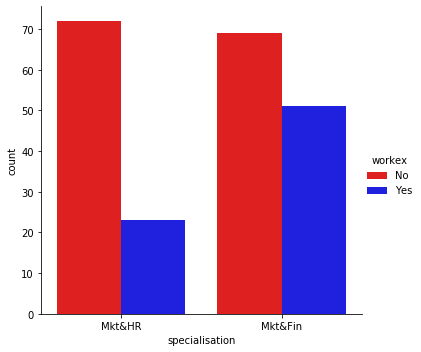

In [8]:
# Let's visualize above result 
sns.catplot(x='specialisation',hue='workex',data=campus_data,kind='count', palette=['red','blue']) 

Most of the marketing and HR students don't have work experience [75%] 

### Let's dig deeper 
We are going to start digging deeper from here ! 
We are taking combinations of 2 categorical features to check how does the same affect the placements...  to make our data analysis in detailed manner. Let's start !!!

In [9]:
# 1) 
# Let's check the status(placed or not placed) based on gender and specialization 
campus_data.groupby(['gender','specialisation']).status.value_counts()

gender  specialisation  status    
F       Mkt&Fin         Placed        28
                        Not Placed     9
        Mkt&HR          Placed        20
                        Not Placed    19
M       Mkt&Fin         Placed        67
                        Not Placed    16
        Mkt&HR          Placed        33
                        Not Placed    23
Name: status, dtype: int64

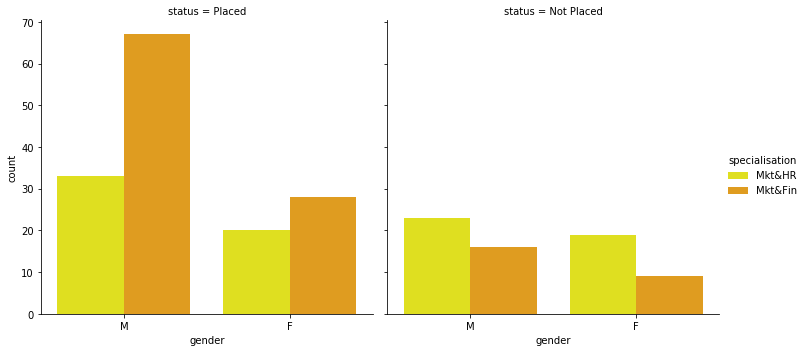

In [8]:
# Visualization of above result 1) 
sns.catplot('gender', hue='specialisation', data=campus_data, col='status', kind='count', palette=['yellow','orange'])

As graph shows us Most of the students have done MBA with specialization in Marketing & Finance and are also got selected for the placements. 

In [10]:
# 2) 
# Let's check the status(placed or not placed) based on gender and stream of graduation  
campus_data.groupby(['gender','degree_t']).status.value_counts() 

gender  degree_t   status    
F       Comm&Mgmt  Placed        33
                   Not Placed    20
        Others     Placed         4
                   Not Placed     2
        Sci&Tech   Placed        11
                   Not Placed     6
M       Comm&Mgmt  Placed        69
                   Not Placed    23
        Others     Not Placed     4
                   Placed         1
        Sci&Tech   Placed        30
                   Not Placed    12
Name: status, dtype: int64

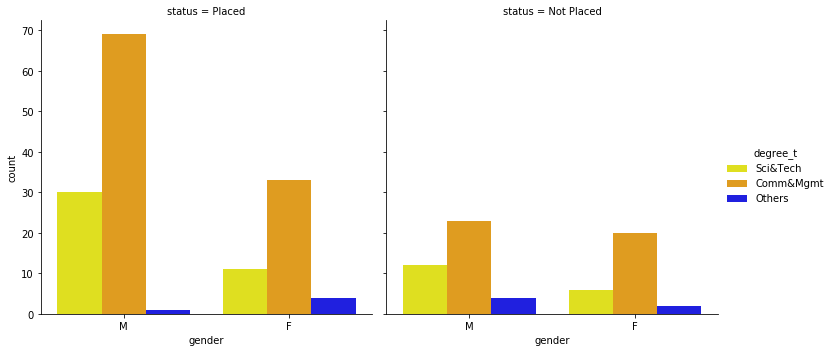

In [11]:
# Visualization of above result 2)
sns.catplot('gender',hue='degree_t',data=campus_data,col='status',kind='count', palette=['yellow','orange','blue']) 

The above graph shows us that most of the student are from commerce & management background who are got selected for placements.  

In [12]:
# 3) 
# here we are taking combination of 2 features(HSC board & graduation stream) to count no. of placed & not placed students 
campus_data.groupby(['hsc_b','degree_t']).status.value_counts() 

hsc_b    degree_t   status    
Central  Comm&Mgmt  Placed        40
                    Not Placed    18
         Others     Placed         4
                    Not Placed     3
         Sci&Tech   Placed        13
                    Not Placed     6
Others   Comm&Mgmt  Placed        62
                    Not Placed    25
         Others     Not Placed     3
                    Placed         1
         Sci&Tech   Placed        28
                    Not Placed    12
Name: status, dtype: int64

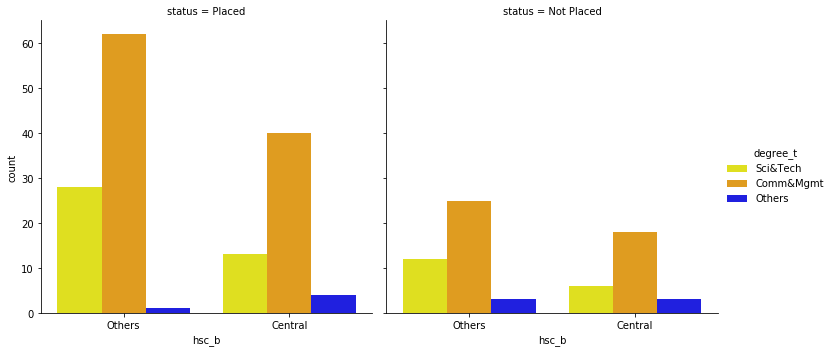

In [13]:
# Visualization of above result 3) 
sns.catplot('hsc_b',hue='degree_t',data=campus_data,col='status',kind='count', palette=['yellow','orange','blue']) 

As we can see here -
Students from Other boards of 12th STD and from Commerce & Management background have got a better placement than central board and other backgrounds. 

In [3]:
# 4)
# now we are taking combination of 2 features (stream of graduation & specialization) 
campus_data.groupby(['degree_t','specialisation']).status.value_counts() 

degree_t   specialisation  status    
Comm&Mgmt  Mkt&Fin         Placed        68
                           Not Placed    18
           Mkt&HR          Placed        34
                           Not Placed    25
Others     Mkt&Fin         Not Placed     2
                           Placed         2
           Mkt&HR          Not Placed     4
                           Placed         3
Sci&Tech   Mkt&Fin         Placed        25
                           Not Placed     5
           Mkt&HR          Placed        16
                           Not Placed    13
Name: status, dtype: int64

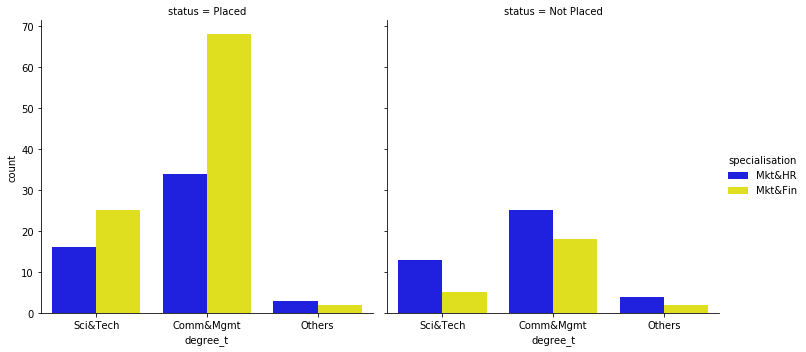

In [4]:
# Visualization of above result 4) 
sns.catplot('degree_t', hue='specialisation', data=campus_data, col='status', kind='count',palette=['blue','yellow'])

Most of the MBA students are from Commerce Background
And Most of the Commerce students opt for Marketing and Finance specilisation
Marketing and Finance has better placement record compared to specialization in Marketing & HR 

In [3]:
# 5)
# now we are taking combination of 2 features (HSC board & specialization) 
campus_data.groupby(['hsc_b','specialisation']).status.value_counts() 

hsc_b    specialisation  status    
Central  Mkt&Fin         Placed        36
                         Not Placed    11
         Mkt&HR          Placed        21
                         Not Placed    16
Others   Mkt&Fin         Placed        59
                         Not Placed    14
         Mkt&HR          Placed        32
                         Not Placed    26
Name: status, dtype: int64

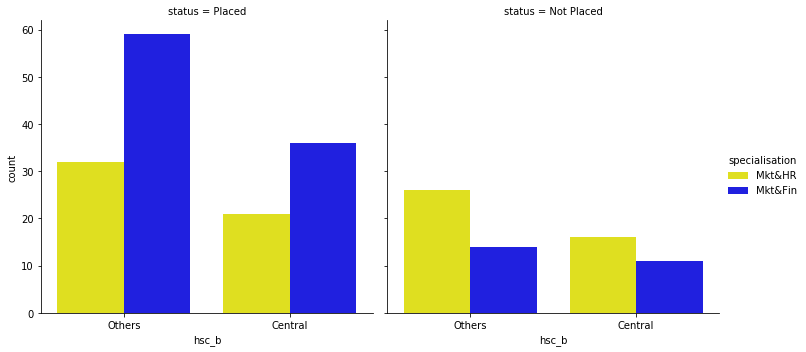

In [4]:
# Visualization of above result 5) 
sns.catplot(x='hsc_b',hue='specialisation',data=campus_data,col='status',kind='count', palette=['yellow','blue'])

As graph shows us 
Firstly, 12th grade Other Board students are more likely to choose Marketing and Finance in MBA
and secondly, 12th grade other board students who having Specialization as Marketing & Finance in MBA are got selected for placements. 

In [5]:
# 6)
# now Let's take 2 features(specialization & work experience) more to check the status count
campus_data.groupby(['specialisation','workex']).status.value_counts() 

specialisation  workex  status    
Mkt&Fin         No      Placed        48
                        Not Placed    21
                Yes     Placed        47
                        Not Placed     4
Mkt&HR          No      Not Placed    36
                        Placed        36
                Yes     Placed        17
                        Not Placed     6
Name: status, dtype: int64

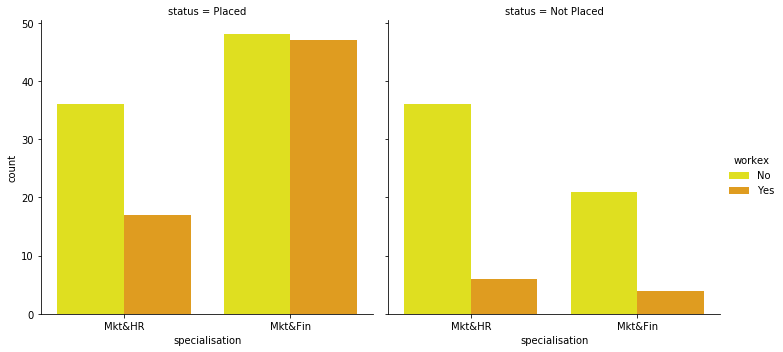

In [6]:
# Visualization of above result 6)
sns.catplot(x='specialisation',hue='workex',data=campus_data, col='status', kind='count', palette=['yellow','orange']) 

As we can see in the graph above -
1. Count of the Students placed is almost same who having specialisation in Marketing & Finance with no work experience and with work experience. 
2. Count of the Students places who having specialisation in Marketing & HR with no work experience is better than who having the same specialisation with work experience.  

######  Let's take our analysis to the next level by analyzing our continuous features in the dataset now !

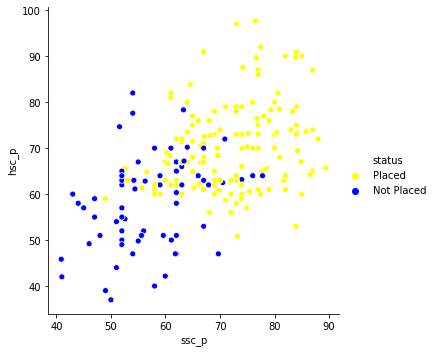

In [34]:
# SSC & HSC percentage in the view of status which means how both the percentage affect the placement?
sns.relplot(x='ssc_p',y='hsc_p',data=campus_data,hue='status', palette=['yellow','blue']) 

Most of the Students who scored more than 60% in their 10th grade as well as in their 12th grade are more likely to get placed. Apparently it's correct but If we see it minutly then we get to know that A very few students who scored below 60% in 12th and in 10th who are also got placed. 

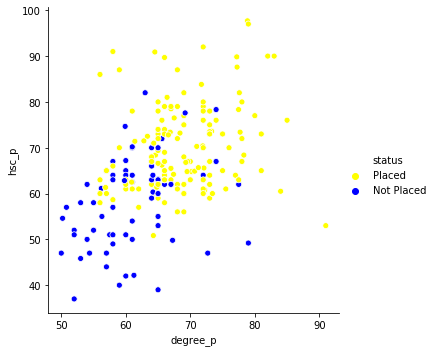

In [9]:
# HSC & degree percentage in the view of status which means how both the percentage affect the placement?
sns.relplot(x='degree_p',y='hsc_p',data=campus_data,hue='status', palette=['yellow','blue'])

Students with UG Aggregate more than 60% and 12th grade percentage with more than 60% are more likely to get placed 

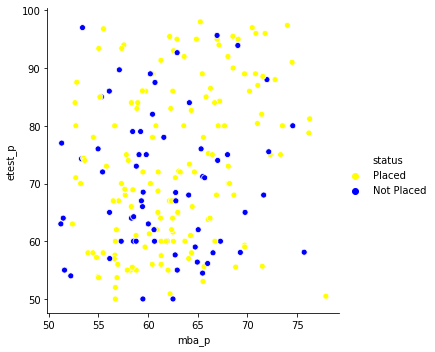

In [10]:
# MBA & test percentage in the view of status which means how both the percentage affect the placement?
sns.relplot(x='mba_p',y='etest_p',data=campus_data,hue='status', palette=['yellow','blue']) 

Very difficult to analyze but still roughly speaking... 
students having MBA & test percentage range in between 50 to 75 are more likely to get placement. 

<Figure size 1800x2520 with 0 Axes>

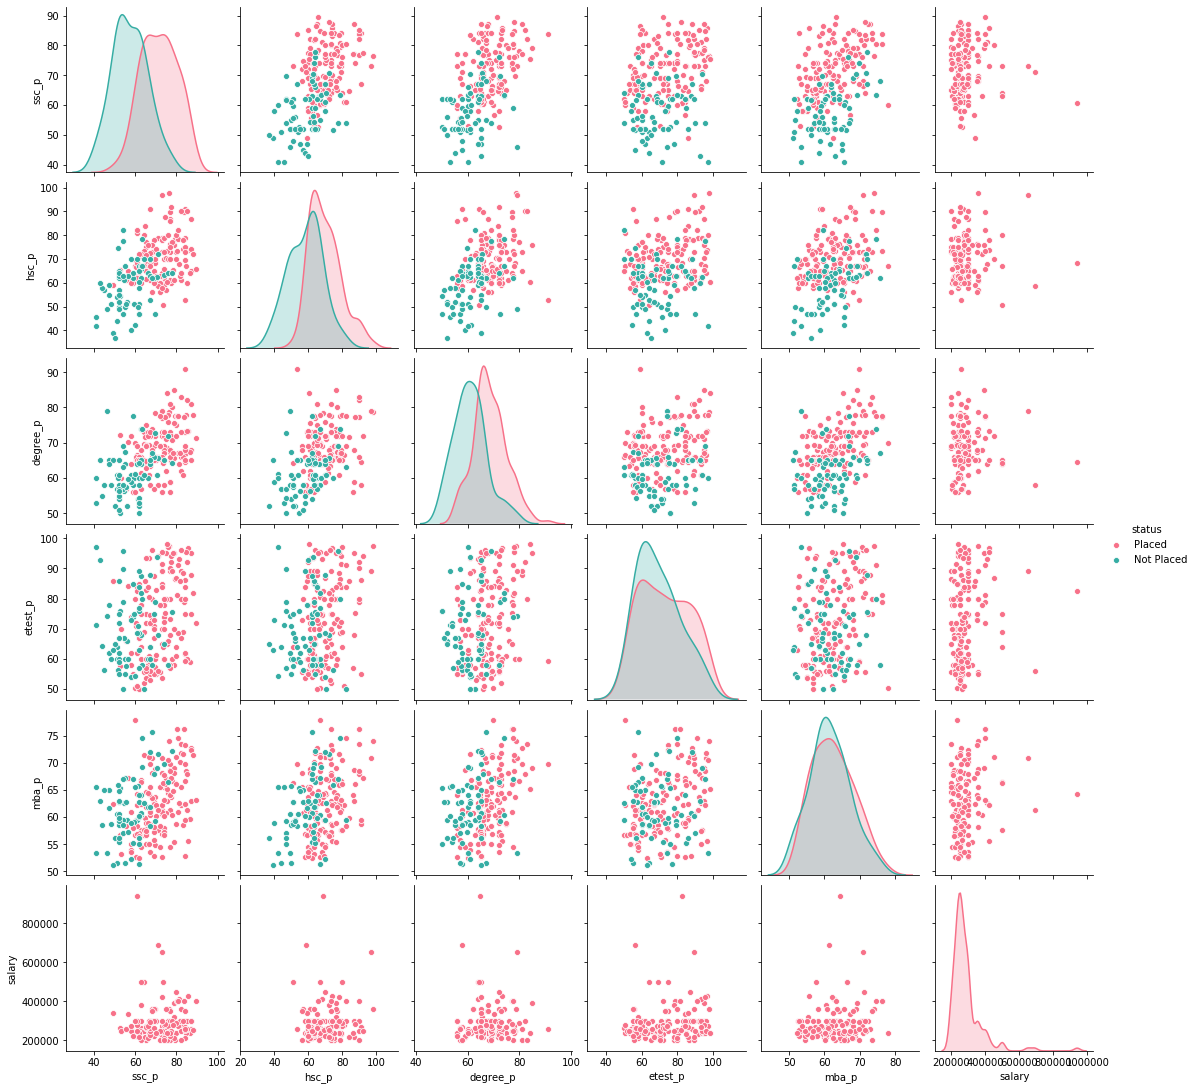

In [25]:
campus_pairplot=campus_data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary','status']]
plt.figure(figsize=(25,35))
g=sns.pairplot(campus_pairplot,hue='status',palette='husl')


From the first column of the plot we can infer that students with their school boards exam 70% are more likely to be placed
From the first column of the plot we can infer that students with their high school boards exam 70% are more likely to be placed.
From the first column of the plot we can infer that students with their Degree exam 65% are more likely to be placed. 

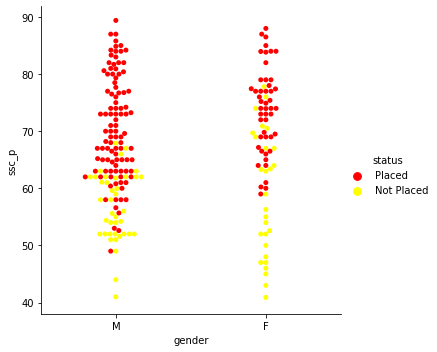

In [33]:
sns.catplot(x='gender',y='ssc_p',data=campus_data,kind='swarm',hue='status', palette=['red','yellow']) 


######  Future Developments 

=> A deeper analysis of all the features. 
=> Predicting the placement of the students. 